(1860,)


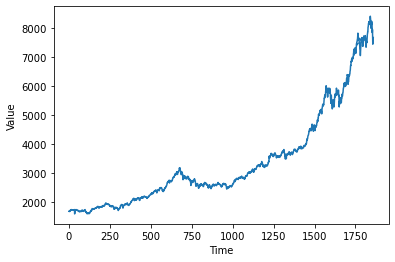

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
f=open("smi.txt","r")
text=f.read()
f.close()
text=text.split("\n")
data=[]
for i in text:
    data.append(i.split("\t")[1])

data=np.array(data)
data=data.astype(float)
print(data.shape)
xaxis= np.arange(len(data))
plt.plot(xaxis,data)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

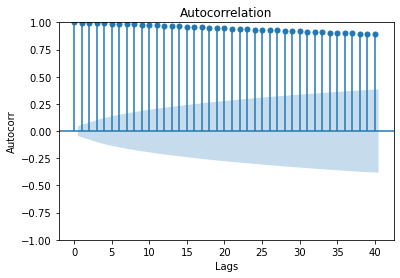

In [2]:
plot_acf(data,lags=40)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.show()

In [3]:
def lags(h, y):
    tmp=0
    tmp2=0
    t_mean=np.mean(y)
    for i in range(h+1, len(y)):
        tmp+=(y[i]-t_mean)*(y[i-h]-t_mean)
    for i in range(len(y)):
        tmp2+=(y[i]-t_mean)**2
    return tmp/tmp2   

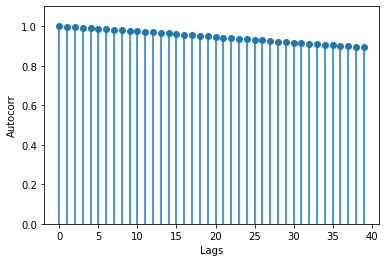

In [4]:
#Aufgabe 4.1
x=np.arange(40)
y=[]
for i in range(40):
    y.append(lags(i,data))
for i in x:
    plt.plot([i,i],[0,y[i]], c='tab:blue')
plt.scatter(x,y)
plt.ylim(0,1.1)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.show()


In [5]:
# It looks very similar to what we've discussed in the lecture with a low descending trend

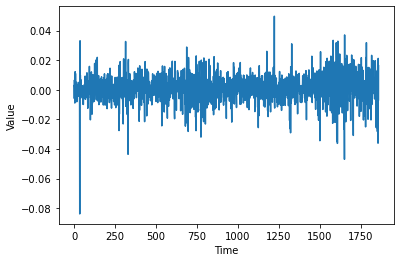

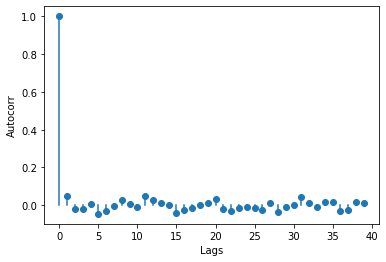

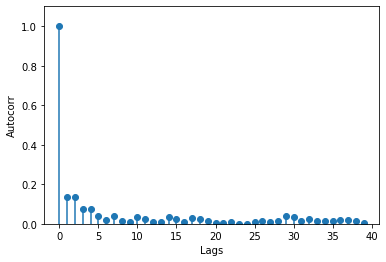

In [6]:
#Aufgabe 4.2
data2=np.ones(len(data)-1)
for i in range(len(data2)):
    data2[i]=np.log(data[i+1]/data[i])
xaxis= np.arange(len(data2))
plt.plot(xaxis,data2)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
x=np.arange(40)
y=[]
for i in range(40):
    y.append(lags(i,data2))
for i in x:
    plt.plot([i,i],[0,y[i]], c='tab:blue')
plt.scatter(x,y)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.show()
data2=data2**2
y=[]
for i in range(40):
    y.append(lags(i,data2))
for i in x:
    plt.plot([i,i],[0,y[i]], c='tab:blue')
plt.scatter(x,y)
plt.ylim(0,1.1)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.show()

In [7]:
# The first few squared autocorrelations are strikingly different from the normal ones, having bigger values 

In [8]:
#Aufgabe 4.3
mse=0
c=0
y1=y[0:len(y)-2]
y2=y[1:len(y)-1]
for i in range(len(y)):
    mse += (y[i]-np.mean(y))**2  
mse=(1/len(y))*mse
for i in range(len(y1)):
    c+= y1[i]*y2[i]
c=(1/len(y1))*c-np.mean(y1)*np.mean(y2)
b1=c/mse
b0=np.mean(y2)-b1*np.mean(y1)
print("alpha:\t"+str(b1))
print("my:\t"+str(b0))

alpha:	0.14106346795495744
my:	0.01961213047129557


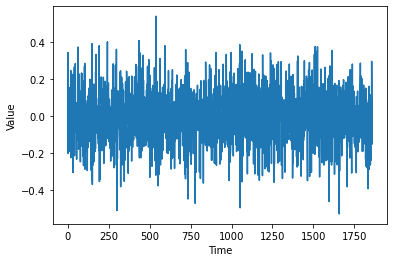

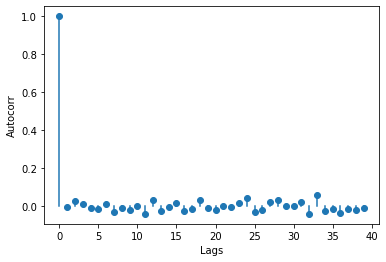

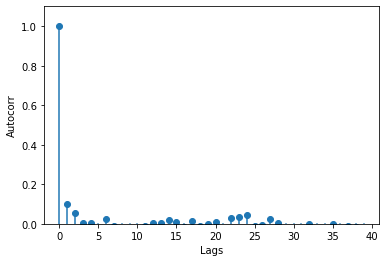

In [9]:
#Aufgabe 4.4
#path1
mean=0
std=1
X=[]
noise=np.random.normal(mean, std, size=2860)
sigma=b0+b1*np.random.rand()
for i in range(len(noise)):
    tmp=noise[i]*sigma**(1/2)
    X.append(tmp)
    sigma=b0+b1*tmp**2
X=np.array(X[1000:])
plt.plot(np.arange(2860-1000),X)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
x=np.arange(40)
y=[]
for i in range(40):
    y.append(lags(i,X))
for i in x:
    plt.plot([i,i],[0,y[i]], c='tab:blue')
plt.scatter(x,y)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.show()
X=X**2
y=[]
for i in range(40):
    y.append(lags(i,X))
for i in x:
    plt.plot([i,i],[0,y[i]], c='tab:blue')
plt.scatter(x,y)
plt.ylim(0,1.1)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.show()

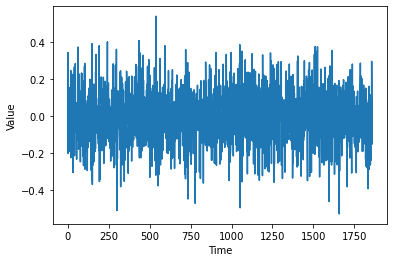

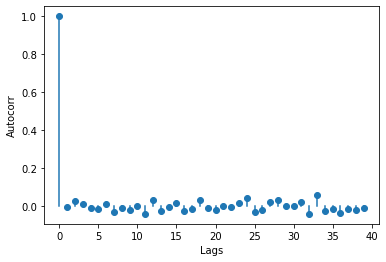

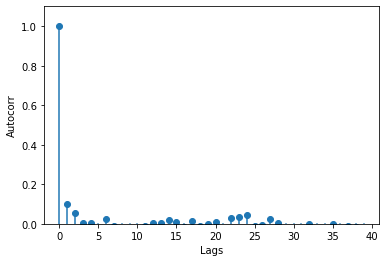

In [10]:
#path2
X=[]

sigma=b0+b1*np.random.rand()
for i in range(len(noise)):
    tmp=noise[i]*sigma**(1/2)
    X.append(tmp)
    sigma=b0+b1*tmp**2
X=np.array(X[1000:])
plt.plot(np.arange(2860-1000),X)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
x=np.arange(40)
y=[]
for i in range(40):
    y.append(lags(i,X))
for i in x:
    plt.plot([i,i],[0,y[i]], c='tab:blue')
plt.scatter(x,y)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.show()
X=X**2
y=[]
for i in range(40):
    y.append(lags(i,X))
for i in x:
    plt.plot([i,i],[0,y[i]], c='tab:blue')
plt.scatter(x,y)
plt.ylim(0,1.1)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.show()

In [11]:
#The Arch Model is not suitable in this case. We can clearly see that the 
#squared autorcorellations have a lot more fluctuations than the log values.